In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_white
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV

In [2]:
# Load the dataset
data = pd.read_csv('assgmt01_student_performance_dataset.csv')

# View the first few rows of the dataset
data.head()

,study_hours_per_week,attendance_rate,previous_exam_scores,assignments_completed,extracurricular_participation,study_attendance_interaction,study_hours_per_week_squared,attendance_rate_squared,assignments_per_week,final_exam_score
0,11.0,96.73,46.86,NaN,1.0,1064.04,121.0,9356.83,1.50,51.83
1,24.0,81.91,64.87,18.0,0.0,NaN,576.0,6709.83,0.72,78.82
2,19.0,75.83,91.81,13.0,1.0,1440.86,361.0,5750.92,0.65,73.94
3,15.0,82.86,95.38,3.0,0.0,1242.83,225.0,6865.04,0.19,68.04
4,12.0,NaN,67.94,12.0,4.0,861.40,144.0,5152.89,0.92,56.65


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Get summary statistics for distribution insights
summary = data.describe()

print("Missing Values:\n", missing_values)
print("\nData Summary:\n", summary)

Missing Values:
 study_hours_per_week             4
attendance_rate                  3
previous_exam_scores             2
assignments_completed            4
extracurricular_participation    2
study_attendance_interaction     5
study_hours_per_week_squared     1
attendance_rate_squared          3
assignments_per_week             0
final_exam_score                 0
dtype: int64

Data Summary:
        study_hours_per_week  attendance_rate  previous_exam_scores  \
count            496.000000       497.000000            498.000000   
mean              17.514113        75.409618             71.136948   
std                7.954657        14.115931             17.636692   
min                5.000000        50.130000             40.010000   
25%               11.000000        63.030000             56.217500   
50%               18.000000        76.720000             71.800000   
75%               25.000000        87.050000             86.415000   
max               30.000000        99.880000

In [4]:
skewness = data.skew()
print(skewness)

study_hours_per_week            -0.023894
attendance_rate                 -0.080246
previous_exam_scores            -0.125529
assignments_completed            0.041367
extracurricular_participation   -0.123888
study_attendance_interaction     0.302711
study_hours_per_week_squared     0.429020
attendance_rate_squared          0.175257
assignments_per_week             1.588407
final_exam_score                 0.163358
dtype: float64


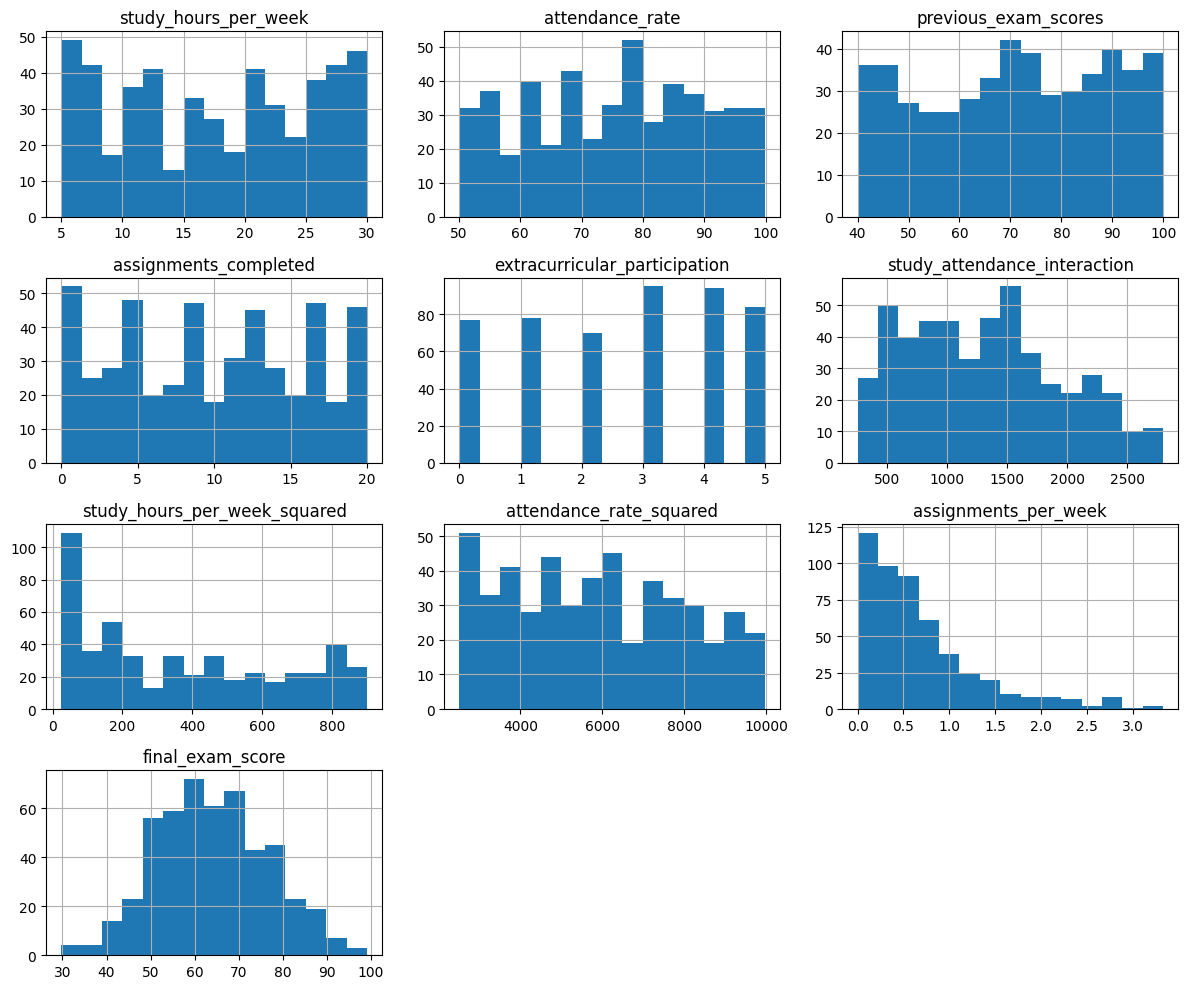

In [5]:
data.hist(figsize=(12, 10), bins=15)
plt.tight_layout()
plt.show()

In [6]:
# Imputation for missing values
# Median imputation
data['previous_exam_scores'].fillna(data['previous_exam_scores'].median(), inplace=True)
data['assignments_completed'].fillna(data['assignments_completed'].median(), inplace=True)

# Mean imputation
data['study_hours_per_week'].fillna(data['study_hours_per_week'].mean(), inplace=True)
data['attendance_rate'].fillna(data['attendance_rate'].mean(), inplace=True)

# Mode imputation
data['extracurricular_participation'].fillna(data['extracurricular_participation'].mode()[0], inplace=True)

# Recalculation
data['study_attendance_interaction'] = data['study_hours_per_week'] * data['attendance_rate']
data['study_hours_per_week_squared'] = data['study_hours_per_week'] ** 2
data['attendance_rate_squared'] = data['attendance_rate'] ** 2


# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Save the cleaned dataset to take a look
data.to_csv('cleaned_student_performance_dataset.csv', index=False)

Missing Values:
 study_hours_per_week             0
attendance_rate                  0
previous_exam_scores             0
assignments_completed            0
extracurricular_participation    0
study_attendance_interaction     0
study_hours_per_week_squared     0
attendance_rate_squared          0
assignments_per_week             0
final_exam_score                 0
dtype: int64


<ipython-input-6-2cf8f14aa02d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['previous_exam_scores'].fillna(data['previous_exam_scores'].median(), inplace=True)
<ipython-input-6-2cf8f14aa02d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

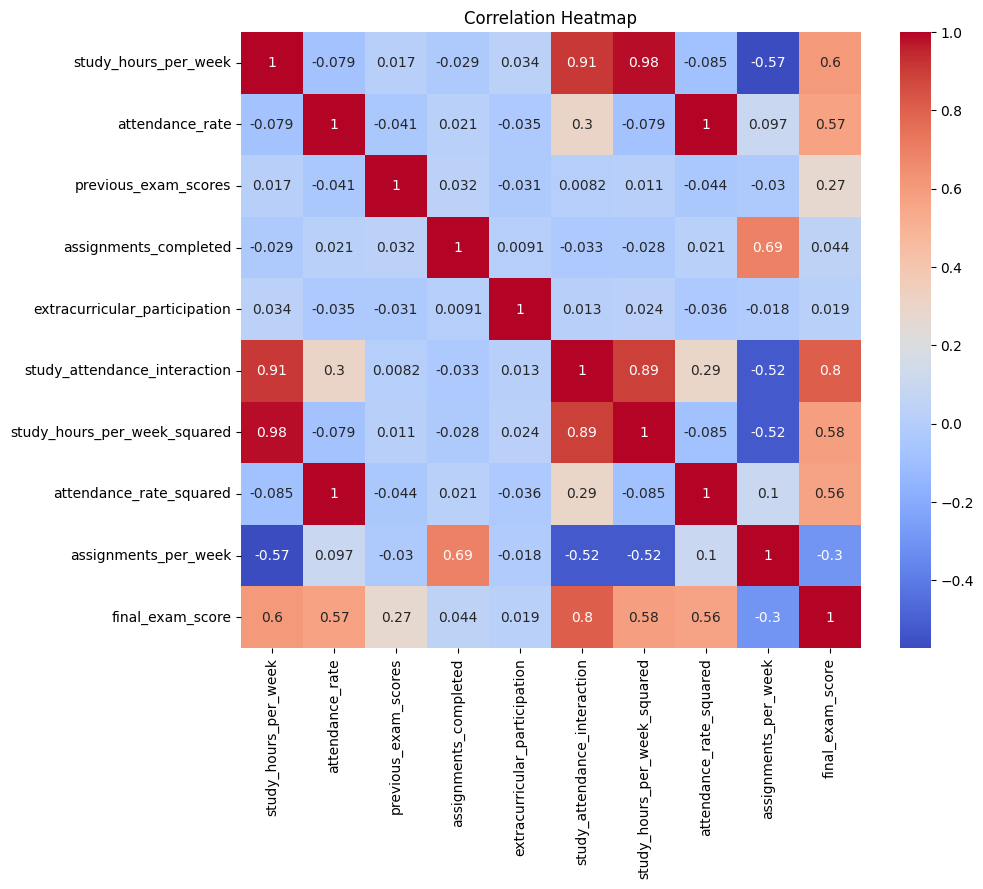

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

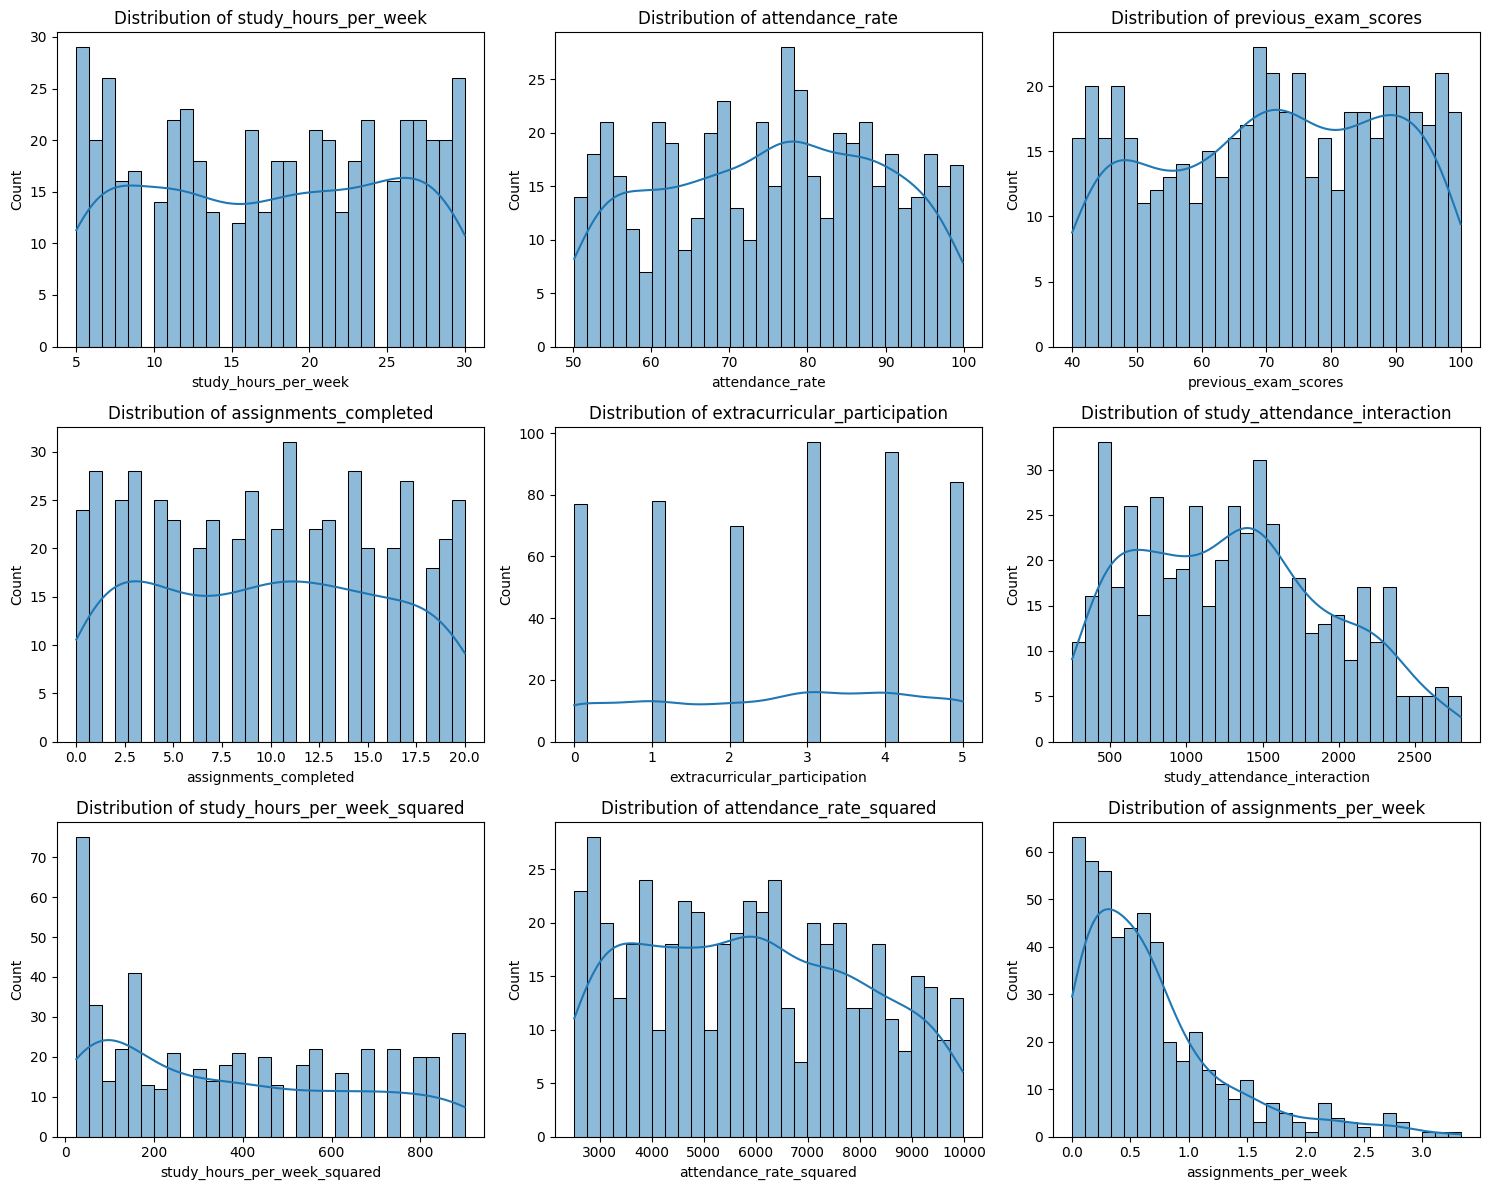

In [8]:
# Drop the target column to keep only continuous features
continuous_features = data.drop(columns=['final_exam_score'])

# Distribution plots for each continuous feature
plt.figure(figsize=(15, 12))
for i, feature in enumerate(continuous_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(continuous_features[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

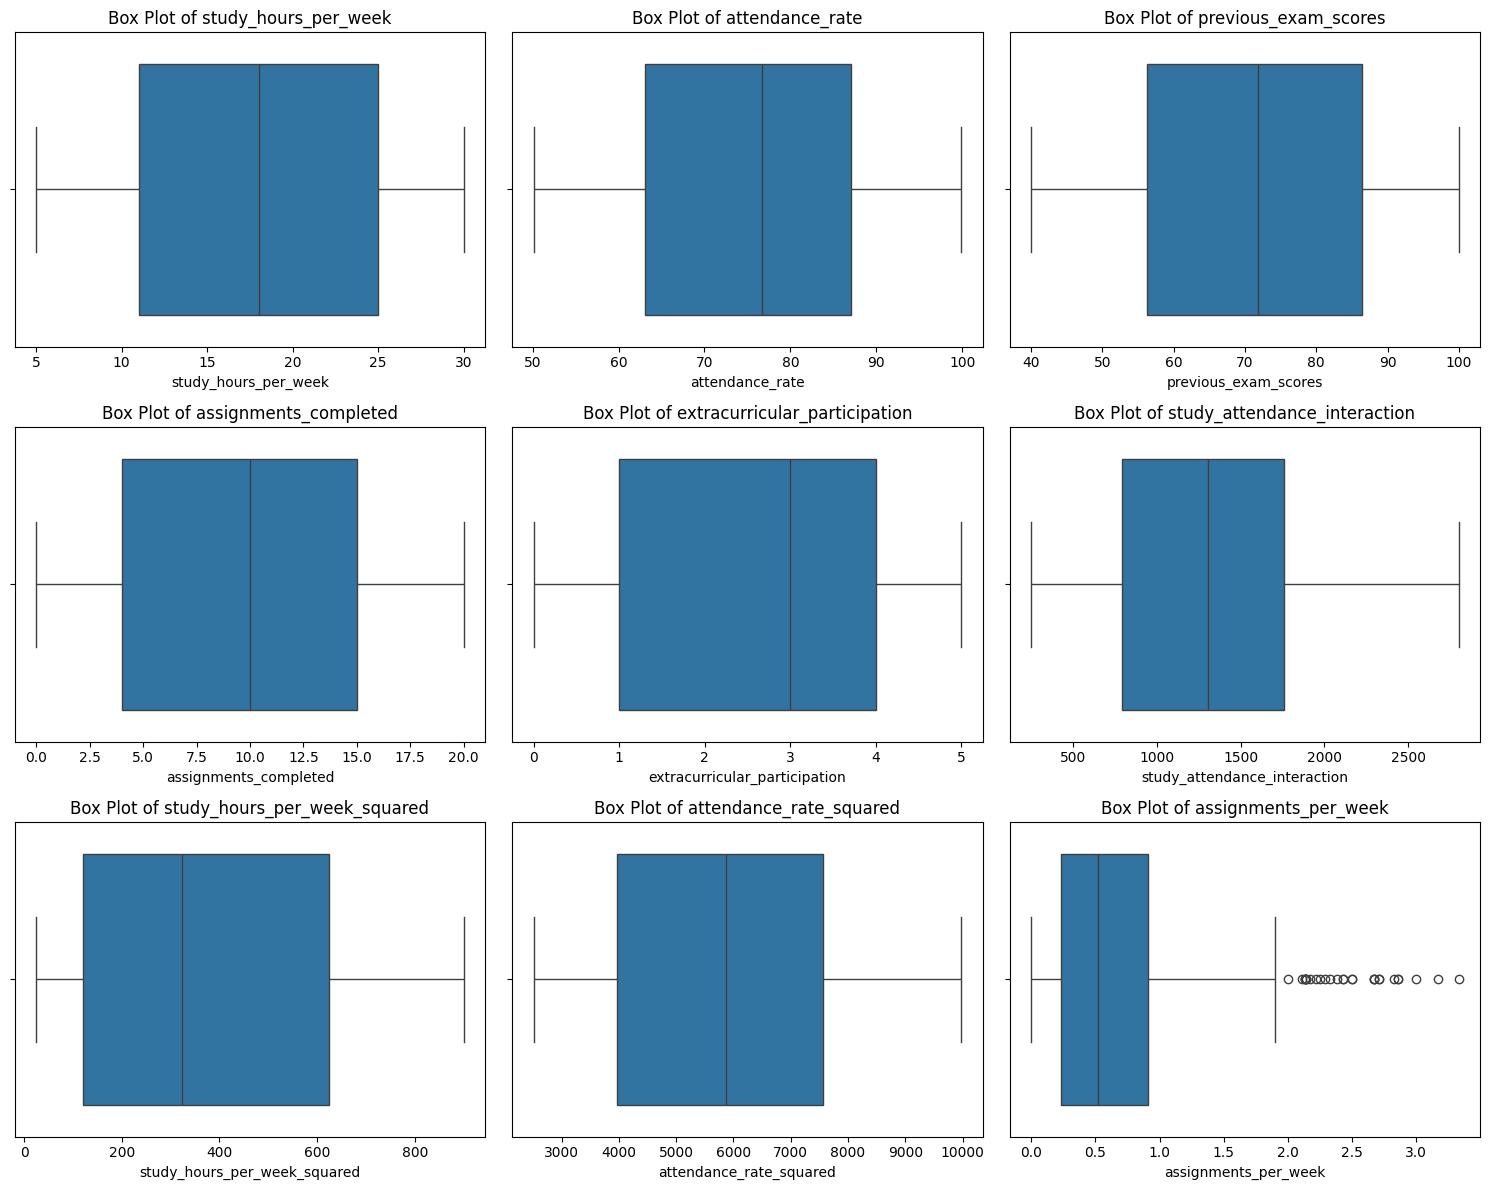

In [9]:
# Box plots for each continuous feature
plt.figure(figsize=(15, 12))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

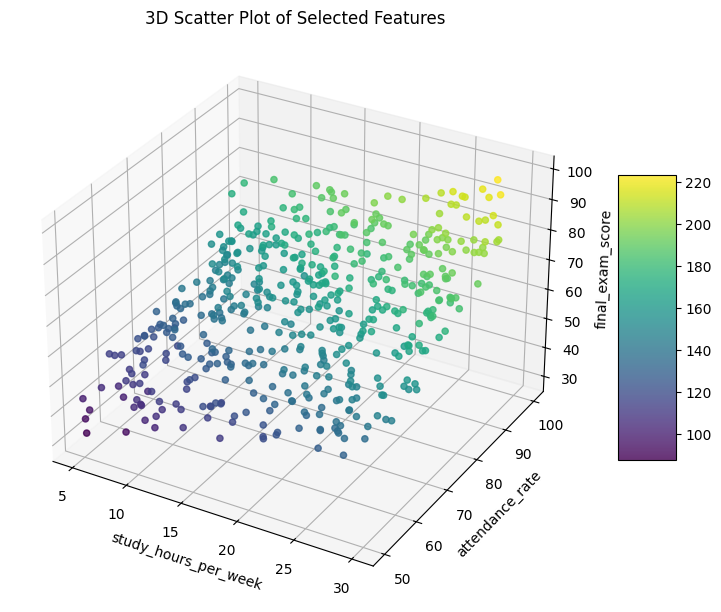

In [10]:
# Selecting 3 features for 3D scatter plot
x = 'study_hours_per_week'
y = 'attendance_rate'
z = 'final_exam_score'

# 3D scatter plot for selected 3 features
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sctt= ax.scatter(data[x], data[y], data[z], alpha=0.8, c=(data[x] + data[y] + data[z]), marker='o')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)


plt.tight_layout()

plt.title('3D Scatter Plot of Selected Features')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)
plt.show()

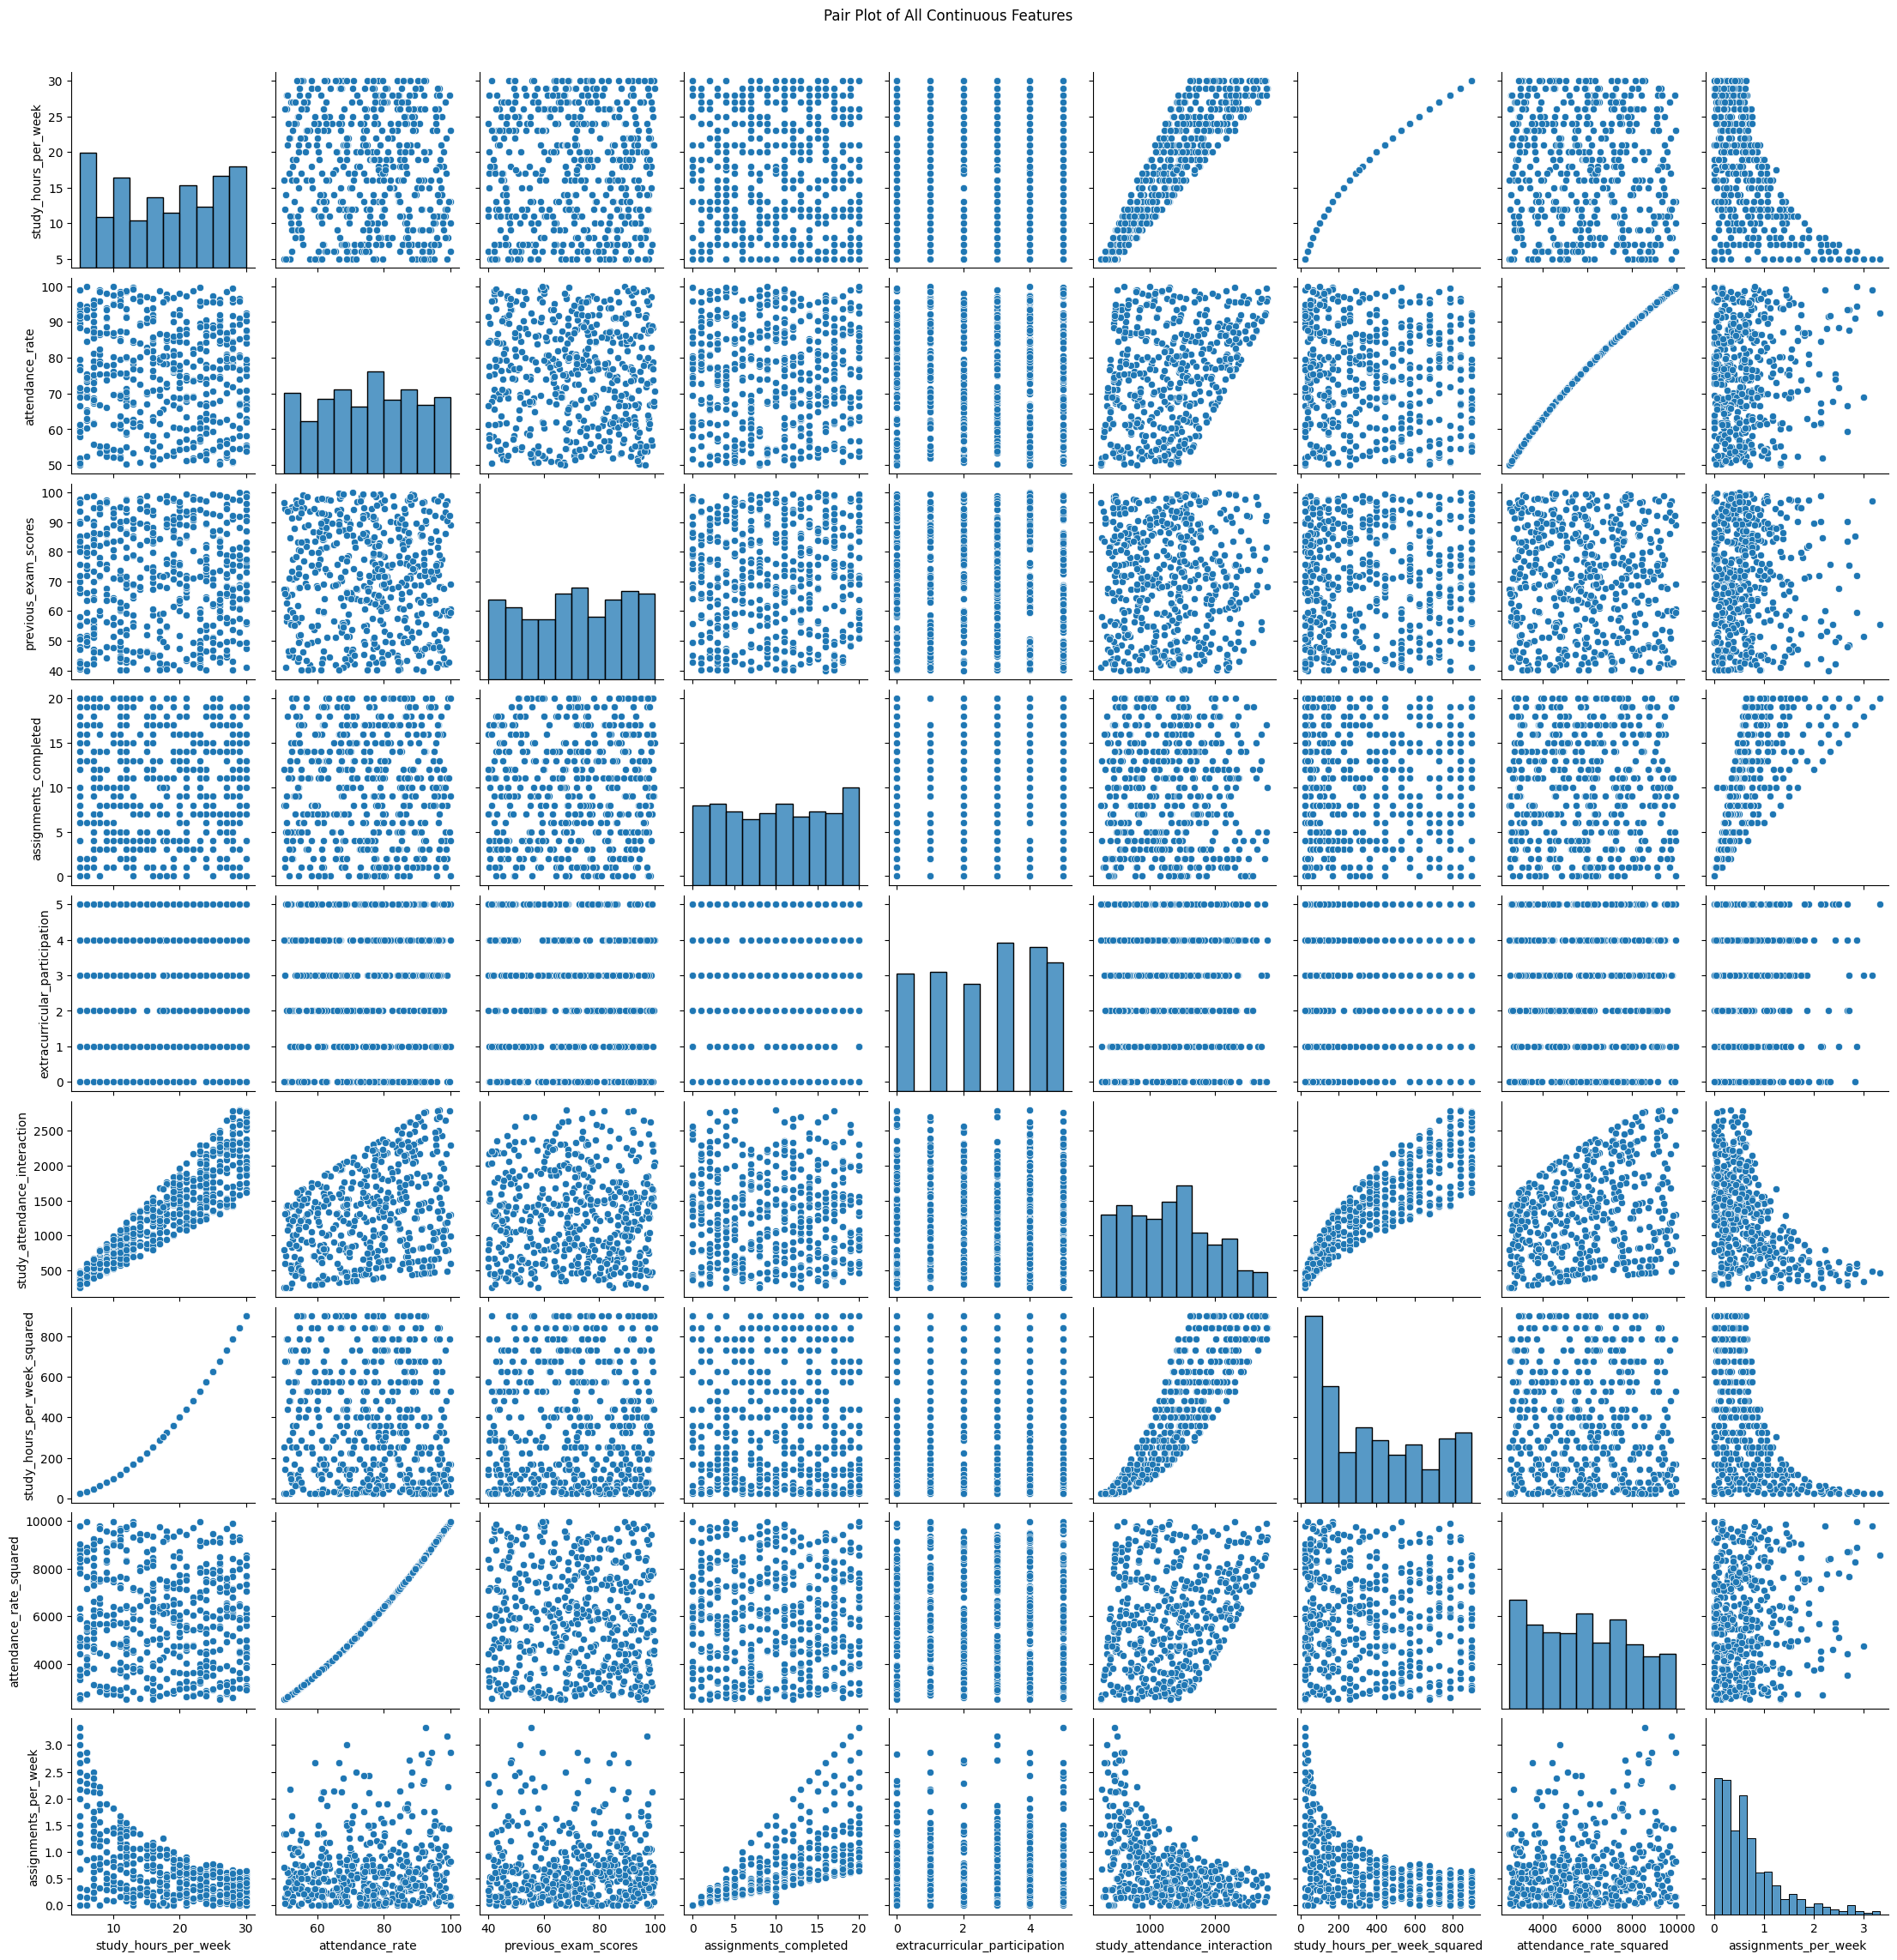

In [11]:
sns.pairplot(continuous_features)
plt.suptitle("Pair Plot of All Continuous Features", y=1.02)
plt.show()

In [12]:
# Calculate VIF for each feature

X = data.drop(columns=['final_exam_score'])

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                         feature         VIF
0           study_hours_per_week  356.443829
1                attendance_rate  430.473859
2           previous_exam_scores   17.398343
3          assignments_completed   13.935397
4  extracurricular_participation    3.407360
5   study_attendance_interaction  145.385309
6   study_hours_per_week_squared  100.258181
7        attendance_rate_squared  234.799346
8           assignments_per_week   13.771996


In [13]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale (excluding the target variable)
features_to_scale = data.drop(columns=['final_exam_score'])

# Initialize StandardScaler and scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Convert scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Calculate VIF for each scaled feature
vif_data = pd.DataFrame()
vif_data['Feature'] = scaled_data.columns
vif_data['VIF'] = [variance_inflation_factor(scaled_data.values, i) for i in range(scaled_data.shape[1])]

print("Variance Inflation Factor (VIF) for each feature: ")
print(vif_data)

Variance Inflation Factor (VIF) for each feature: 
                         Feature         VIF
0           study_hours_per_week   74.304904
1                attendance_rate  143.188544
2           previous_exam_scores    1.015227
3          assignments_completed    3.938334
4  extracurricular_participation    1.007462
5   study_attendance_interaction   33.891189
6   study_hours_per_week_squared   38.066360
7        attendance_rate_squared  132.606834
8           assignments_per_week    6.429572


In [14]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale (excluding the target variable)
features_to_scale = data[['study_hours_per_week', 'attendance_rate', 'previous_exam_scores',
                          'assignments_completed', 'extracurricular_participation', 'assignments_per_week']]

# Initialize StandardScaler and scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Convert scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Calculate VIF for each scaled feature
vif_data = pd.DataFrame()
vif_data['Feature'] = scaled_data.columns
vif_data['VIF'] = [variance_inflation_factor(scaled_data.values, i) for i in range(scaled_data.shape[1])]

print("Variance Inflation Factor (VIF) for each feature: ")
print(vif_data)

Variance Inflation Factor (VIF) for each feature: 
                         Feature       VIF
0           study_hours_per_week  2.453772
1                attendance_rate  1.016219
2           previous_exam_scores  1.012403
3          assignments_completed  3.203613
4  extracurricular_participation  1.003644
5           assignments_per_week  4.780670


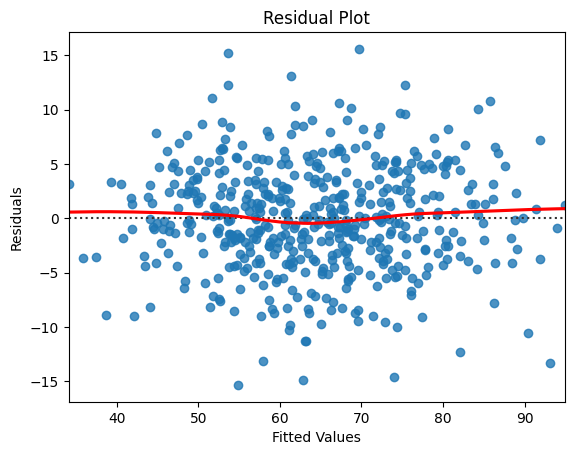

In [15]:
# Detect heteroscedasticity through residual plots

X_train = data.drop(columns=['final_exam_score'])
y_train = data['final_exam_score']

# Add a constant to the model (intercept)
X_with_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_with_const).fit()
residuals = model.resid

plt.figure()
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

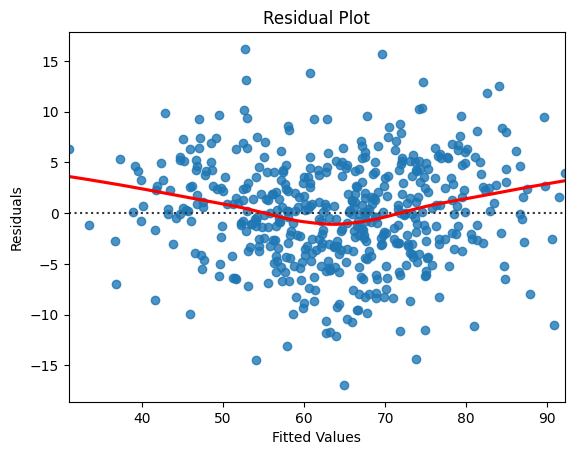

In [16]:
# Detect heteroscedasticity through residual plots

X_train = scaled_data  # Scaled features
y_train = data['final_exam_score']   # Target variable (unchanged)

# Add a constant to the model (intercept)
X_with_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_with_const).fit()
residuals = model.resid

plt.figure()
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [17]:
# Perform the White test

white_test = het_white(residuals, X_with_const)

# Extracting test statistic and p-value
test_statistic, test_statistic_p_value, _, _ = white_test

print("White Test for Heteroscedasticity:")
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {test_statistic_p_value}")

# Interpretation of results
if test_statistic_p_value < 0.05:
    print("The result is statistically significant; we reject the null hypothesis.")
    print("This suggests evidence of heteroscedasticity in the residuals.")
else:
    print("The result is not statistically significant; we fail to reject the null hypothesis.")
    print("This suggests no evidence of heteroscedasticity in the residuals.")

White Test for Heteroscedasticity:
Test Statistic: 27.005108132168832
P-value: 0.46351923171080434
The result is not statistically significant; we fail to reject the null hypothesis.
This suggests no evidence of heteroscedasticity in the residuals.


In [18]:
# Splitting data into training and testing sets (80:20 split)

# Define original features and target
original_features = [
    'study_hours_per_week',
    'attendance_rate',
    'previous_exam_scores',
    'assignments_completed',
    'extracurricular_participation'
]

X = data[original_features]
y = data['final_exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [19]:
# Train a simple linear regression model
lnr = LinearRegression()
lnr.fit(X_train, y_train)

# Predict and evaluate
y_pred_linear = lnr.predict(X_test)

# Evaluate the linear regression model
lnr_mse = mean_squared_error(y_test, y_pred_linear)
lnr_r2 = r2_score(y_test, y_pred_linear)
print("Linear Regression MSE:", lnr_mse)
print("Linear Regression R²:", lnr_r2)

Linear Regression MSE: 25.039540022870757
Linear Regression R²: 0.8295027270691231


In [20]:
# Train the Lasso model with 5 fold cross-validation
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# print thr best alpha from LassoCV
best_alpha = lasso_cv.alpha_
print(f"Best alpha value for Lasso Regression: {best_alpha}")

# Train Lasso with best alpha
lasso_best = Lasso(alpha=best_alpha, random_state=0, max_iter=10000)
lasso_best.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_lasso = lasso_best.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Performance:")
print(f"Mean Squared Error (MSE):", lasso_mse)
print(f"R-squared (R2):", lasso_r2)

# Display coefficients with feature names
coef_df = pd.DataFrame({
    'Feature': original_features,
    'Coefficient': lasso_best.coef_
})
print("\nLasso Regression Coefficients:")
print(coef_df)

# Identify features with non-zero coefficients
non_zero_features = coef_df[coef_df['Coefficient'] != 0]['Feature'].tolist()
print("\nFeatures with non-zero coefficients:", non_zero_features)

Best alpha value for Lasso Regression: 0.9916342601233896

Lasso Regression Performance:
Mean Squared Error (MSE): 25.3291187351082
R-squared (R2): 0.8275309504034886

Lasso Regression Coefficients:
                         Feature  Coefficient
0           study_hours_per_week     0.987290
1                attendance_rate     0.561895
2           previous_exam_scores     0.216274
3          assignments_completed     0.078817
4  extracurricular_participation     0.000000

Features with non-zero coefficients: ['study_hours_per_week', 'attendance_rate', 'previous_exam_scores', 'assignments_completed']


In [21]:
# Set up the Ridge regression model with cross-validation for tuning alpha
ridge = Ridge(max_iter=10000)
# params = {'alpha': [0.01, 0.1, 1, 10, 100, 250, 300, 350, 400, 450, 500, 750, 1000]}  # Grid of alpha values to search
params = {'alpha': np.logspace(-2, 3, 50)}

# Use GridSearchCV to find the best alpha parameter
ridge_cv = GridSearchCV(ridge, params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# Retrieve the best model
best_alpha_ridge = ridge_cv.best_params_['alpha']
print(f"Best alpha value for Ridge Regression: {best_alpha_ridge}")

# Train the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha_ridge, max_iter=10000)
ridge_best.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_ridge = ridge_best.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Performance:")
print(f"Mean Squared Error (MSE): ", ridge_mse)
print(f"R-squared (R2):", ridge_r2)


# Display coefficients
ridge_coefficients = pd.DataFrame({
    'Feature': original_features,
    'Coefficient': ridge_best.coef_
})
print("\nRidge Regression Coefficients:")
print(ridge_coefficients)

Best alpha value for Ridge Regression: 390.6939937054621

Ridge Regression Performance:
Mean Squared Error (MSE):  25.353227901937135
R-squared (R2): 0.8273667881547726

Ridge Regression Coefficients:
                         Feature  Coefficient
0           study_hours_per_week     0.985825
1                attendance_rate     0.563961
2           previous_exam_scores     0.219301
3          assignments_completed     0.100797
4  extracurricular_participation     0.134187


In [22]:
# Evaluation
models = ["Baseline Linear Regression", "Lasso Regression", "Ridge Regression"]
mse_values = [
    mean_squared_error(y_test, y_pred_linear),
    mean_squared_error(y_test, y_pred_lasso),
    mean_squared_error(y_test, y_pred_ridge),
]
r2_scores = [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_ridge),
]

for i, model in enumerate(models):
    print(f"{model} - MSE: {mse_values[i]}, R2 Score: {r2_scores[i]}")

Baseline Linear Regression - MSE: 25.039540022870757, R2 Score: 0.8295027270691231
Lasso Regression - MSE: 25.3291187351082, R2 Score: 0.8275309504034886
Ridge Regression - MSE: 25.353227901937135, R2 Score: 0.8273667881547726


In [23]:
import joblib

lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

joblib.dump(lasso, 'lasso_model.joblib')

ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train, y_train)

joblib.dump(ridge, 'ridge_model.joblib')

['ridge_model.joblib']